### PHYS3600 Fall 2021, Worksheet 4: Welcome to the world of variable stars. Due Nov 17.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split, KFold, learning_curve, \
    StratifiedKFold
import pandas as pd

#### Original work statement: 

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

#### Your name: Jake Postiglione

#### Data description

The data we use for this worksheet are about stars. Our features are the so-called "colors", which give an indication of whether a star emits more blue, green, yellow, or red light. We are trying to predict whether a star is a special type of star called a RR-Lyrae variable star. So our target values will be yes/no (1/0 in the language of numpy arrays).

1\. Load the data for features and target from the appropriate files and save them as numpy arrays. (note: the default delimiter won't work, these are comma separated values!)

In [2]:
np.random.seed(1218)


def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


features = pd.read_csv('RRLyrae_features_small.txt', header=None, names=['Blue', 'Green', 'Yellow', 'Red']).to_numpy()
targets = np.loadtxt('RRLyrae_labels_small.txt')

features, targets = unison_shuffled_copies(features, targets)

print(features.shape, targets.shape, np.count_nonzero(targets == 1))

(2483, 4) (2483,) 483


2\. Answer the following questions:

Is this a classification or regression problem?

    This is a classification problem since we want to determine if, in this case a star, is a RR-Lyrae variable star based on the intensity of light it emits.

Is this supervised or unsupervised learning?

    This would be supervised learning since the data is pre labeled.

How many instances are in this data set?

    There are 2483 instances in this data set.

How many features?

    There are 4 features in this data set, 'Blue', 'Green', 'Yellow', and 'Red' intensity of emitted light.

How many RR Lyrae stars (i.e., examples of the positive class) are in the data set?

    483 stars in this data set are classified as RR-Lyrae stars.

What would be the accuracy of a classifier that classifies all objects in the data set as non-RR Lyrae?

    If a classifier were to classify all objects in the dataset as non-RR Lyrae, the accuracy would be 80.5%

3\. Use a Decision Tree Classifier, and implement k-fold cross validation algorithm using the syntax in the second cell.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=2)

model = DecisionTreeClassifier(random_state=5)
model.fit(X_train, y_train)

cvKFold = KFold(shuffle=True, n_splits=5, random_state=5)

scores = cross_validate(model, features, targets, cv=cvKFold)

4\. Report the scores, and calculate the mean and standard deviation of the scores vector. 

In [4]:
print("Scores:", scores['test_score'])

print("Mean: {:.3f}".format(scores['test_score'].mean()),
      "Standard Deviation: {:.3f}".format(scores['test_score'].std()))

Scores: [0.97384306 0.96780684 0.9778672  0.94153226 0.97782258]
Mean: 0.968 Standard Deviation: 0.014


5\. Print out the confusion matrix for your model (Note: you are not asked to plot it, although I won't stop you if you want to!) To generate the predictions, you can use the "cross_val_predict" function:

In [5]:
y_predict = cross_val_predict(model, features, targets, cv=cvKFold)

cm = metrics.confusion_matrix(targets, y_predict)
print(cm)

[[1958   42]
 [  38  445]]


6\. Based on the confusion matrix, how many true positive, true negative, false positive, false negative instances do you have?

True Positive: 446
True Negative: 1958
False Positive: 42
False Negative: 37

7\. Based on the definitions given on the slides, calculate accuracy, precision and recall. <b>Important:</b> Write your steps and do not use built-in functions. 

accuracy = $(tp+tn)/(tp+tn+fp+fn) = (446 + 1958) / (446 + 1958 + 42 + 37) = \boxed{0.968}$

precision = $tp / (tp + fp) = 446 / (446 + 42) = \boxed{0.914}$

recall = $tp / (tp + fn) = 119 / (119 + 37) = \boxed{0.923}$

8\. Which evaluation metric is used by the cross validation score in 4.? [To answer this question, you might need to check out the description of the function]. Given the distribution of classes in your data set, do you see a possible issue?

From what I can find, the cross-validation method seems to be calculating the accuracy for test scores, this can be an issue with our test data since it is rather unbalanced.

9\. Other evaluation metrics can be found in scikit-learn using the code below.

In [6]:
print(metrics.accuracy_score(targets, y_predict))
print(metrics.recall_score(targets, y_predict))
print(metrics.precision_score(targets, y_predict))
print(metrics.f1_score(targets, y_predict))
print("")
print(metrics.accuracy_score(y_predict, targets))
print(metrics.recall_score(y_predict, targets))
print(metrics.precision_score(y_predict, targets))
print(metrics.f1_score(y_predict, targets))

0.9677809101892871
0.9213250517598344
0.9137577002053389
0.9175257731958764

0.9677809101892871
0.9137577002053389
0.9213250517598344
0.9175257731958764


What happens to each of the metrics above if you flip y and y_pred? 


The f1_score and accuracy score remain the same regardless of which variable is first, but for different reasons. The recall and precisions scores flip, which makes sense since the fp and fn also swap when reversing the variables.

the f1_score remains the same due to the commutative property of multiplication and addition since precision and recall are swapped.

To compare performance for now, let's use the F1 score, a weighted average of precision and recall.

F1 = 2 * (precision * recall) / (precision + recall)

10\. Find out how to use the f1 score (instead of accuracy) as an optional argument of the cross_validate function and report the mean and standard deviation of the scores associated to this evaluation metric.


In [7]:
scorer = make_scorer(f1_score)
scores = cross_validate(model, features, targets, cv=cvKFold, scoring=scorer)

print("Scores:", scores['test_score'])
print("Mean: {:.3f}".format(scores['test_score'].mean()),
      "Standard Deviation: {:.3f}".format(scores['test_score'].std()))

Scores: [0.92655367 0.91208791 0.94835681 0.86635945 0.93922652]
Mean: 0.919 Standard Deviation: 0.029


11\. It is now time to look at some diagnostics. Use the cross_validate function with 'return_train_score = True'. Compare the f1 train and test scores obtained by your model. Based on this result, do you think your algorithm suffers from high variance or high bias and why?

In [8]:
scores = cross_validate(model, features, targets, cv=cvKFold, scoring=scorer, return_train_score=True)
print("Test Scores:", scores['test_score'])
print("Train Scores:", scores['train_score'])

Test Scores: [0.92655367 0.91208791 0.94835681 0.86635945 0.93922652]
Train Scores: [1. 1. 1. 1. 1.]


Based on this diagnostics, it would seem that the model is has high variance. Unless I have something set up incorrectly, which I'm afraid I might, the training scores are showing that the model it able to correctly classify the training set without any errors, but has some issues classifying the test set, meaning it does not generalize well.

12\. Finally, we can look at learning curves. Use the code in the notebook "HP_Chap3_Filled" to plot learning curves. Based on what you see in the plot, do you think getting more training data would help? (Justify your answer)?



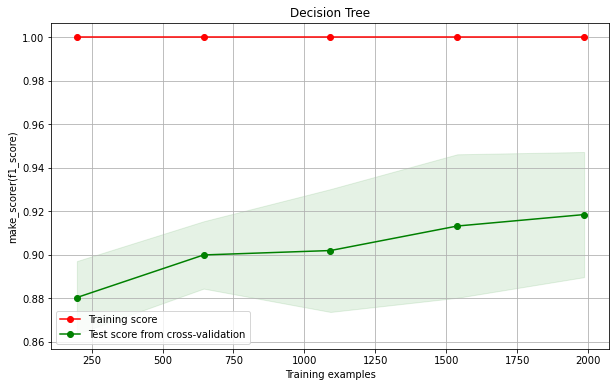

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring='accuracy'):
    plt.figure(figsize=(10, 6))
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel(str(scoring))

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score from cross-validation")

    plt.legend(loc="best")
    return plt


plot_learning_curve(model, 'Decision Tree', features, targets, cv=cvKFold, scoring=scorer);

<b> Extra Credit </b>

13\. What did I do wrong (bad practice) in 3. and 5. ?

I believe, and I could be completely wrong, that the full data set was used for training the model as apposed to splitting the set and having a training and test set.

14\. Train a SVM model with rbf kernel and see if you can beat the f1 score from the DT. Do you notice any other improvement?

In [10]:
svcModel = LinearSVC(dual=False, C=1000)
cvSVC = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
svcScores = cross_validate(svcModel, features, targets, cv=cvSVC, scoring=scorer, return_train_score=True)

print("Scores:", svcScores['test_score'])
print("Mean: {:.3f}".format(svcScores['test_score'].mean()),
      "Standard Deviation: {:.3f}".format(svcScores['test_score'].std()))

Scores: [0.92385787 0.93333333 0.93532338 0.93939394 0.90810811]
Mean: 0.928 Standard Deviation: 0.011


Compared to the Decision Tree, it seems like the SVM model scores slightly higher with a mean of 0.928 and a lower deviation that the standard deviation of the DT model.